In [2]:
import pandas as pd
import numpy as np
import sklearn


import matplotlib.pyplot as plt
%matplotlib inline

Calculating flight **duration** and concatinating it with the original dataset:

In [52]:
Data = pd.read_csv('flight_delay.csv')
Schedule = Data[['Scheduled depature time', 'Scheduled arrival time']]

Duration = []
for Departure, Arrival in Schedule.iloc:
  Dur = pd._libs.tslib.Timestamp(Arrival) - pd._libs.tslib.Timestamp(Departure)
  Duration.append(Dur / np.timedelta64(1, "m"))
  

type(Duration[1])
Duration = pd.Series(Duration)
new_col = pd.DataFrame(Duration, columns=["Duration"])
df = pd.concat([Data, new_col], axis=1)
df



,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0
...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0


Lable Encoding and add new features:


In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Encoded = le.fit_transform(df["Depature Airport"])
Departure_Encoded = pd.DataFrame(Encoded, columns=["Departure_Encoded"])
df = pd.concat([df, Departure_Encoded], axis=1)
Encoded = le.fit_transform(df["Destination Airport"])
Destination_Encoded = pd.DataFrame(Encoded, columns=["Destination_Encoded"])
df = pd.concat([df, Destination_Encoded], axis=1)
df


,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration,Departure_Encoded,Destination_Encoded
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0,144,56
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0,144,68
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0,144,94
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0,144,82
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0,113,144
...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0,144,145
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0,83,144
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0,144,37
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0,144,157


Calculating ***departure_delay_mean***:

In [144]:
mean_delay = []
template = []
for i in df['Departure_Encoded'].value_counts().index:
  mean_delay.append(df['Delay'].iloc[df[(df.Departure_Encoded == i)].index].sum() / len(df[(df.Departure_Encoded == i)].index))
mean_delay
MeanDelay = pd.DataFrame(mean_delay, columns=["Mean_delay"])
Mean = pd.concat([pd.DataFrame(df['Departure_Encoded'].value_counts().index, columns = ["Index"]), MeanDelay], axis=1)
for j in  df['Departure_Encoded']:
  template.append(Mean.Mean_delay[Mean[(Mean.Index == j)].Mean_delay.index[0]])
template


[8.22178263076197,
 8.22178263076197,
 8.22178263076197,
 8.22178263076197,
 13.001769911504425,
 10.06833210874357,
 8.22178263076197,
 12.648882113821138,
 8.22178263076197,
 11.185017695635077,
 11.513028926607697,
 8.22178263076197,
 8.22178263076197,
 8.22178263076197,
 5.828510938602681,
 12.922188243289161,
 8.22178263076197,
 8.22178263076197,
 12.668521563171874,
 8.22178263076197,
 8.22178263076197,
 11.720455306327418,
 12.514506254990684,
 8.522017458777885,
 8.22178263076197,
 8.22178263076197,
 8.22178263076197,
 16.677856681730148,
 8.22178263076197,
 8.22178263076197,
 7.517754868270332,
 12.251481481481482,
 8.22178263076197,
 14.286532951289399,
 9.087638821825205,
 8.22178263076197,
 12.85460372960373,
 8.22178263076197,
 8.796137339055795,
 8.688089773017088,
 8.22178263076197,
 13.676974047487576,
 8.522882557689828,
 8.22178263076197,
 8.861766065649562,
 12.616372391653291,
 10.788436123348017,
 8.22178263076197,
 8.22178263076197,
 8.22178263076197,
 8.221782630

In [145]:

template = pd.DataFrame(template[:], columns=["departure_delay_mean"])
df = pd.concat([df, template], axis=1)
df



,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration,Departure_Encoded,Destination_Encoded,departure_delay_mean
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0,144,56,8.221783
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0,144,68,8.221783
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0,144,94,8.221783
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0,144,82,8.221783
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0,113,144,13.001770
...,...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0,144,145,8.221783
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0,83,144,5.190694
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0,144,37,8.221783
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0,144,157,8.221783


Adding new features(years,months, days of weeks):

In [146]:
Arrival_plot = []
Departure_plot = []
X1 = df
Schedule_plot = X1[['Scheduled depature time', 'Scheduled arrival time']]
for Dep, Arr in Schedule_plot.iloc:
  Arrival_plot.append(pd._libs.tslib.Timestamp(Arr))
  Departure_plot.append(pd._libs.tslib.Timestamp(Dep))

# Arrival time:
Arrival_plot = pd.Series(Arrival_plot)
Arrival_years = Arrival_plot.dt.year
Arrival_months = Arrival_plot.dt.month
Arrival_weekdays = Arrival_plot.dt.dayofweek
new_col = pd.DataFrame(Arrival_years, columns=['Arrival years'])
X1 = pd.concat([df, new_col], axis=1)
new_col = pd.DataFrame(Arrival_months, columns=['Arrival months'])
X1 = pd.concat([X1, new_col], axis=1)
new_col = pd.DataFrame(Arrival_weekdays, columns=['Arrival weekdays'])
X1 = pd.concat([X1, new_col], axis=1)
# Departure time:
# Departure_plot = pd.Series(Departure_plot)
# Departure_years = Departure_plot.dt.year
# Departure_months = Departure_plot.dt.month
# Departure_Weekdays = Departure_plot.dt.dayofweek
X1
df = X1
df

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration,Departure_Encoded,Destination_Encoded,departure_delay_mean,Arrival years,Arrival months,Arrival weekdays
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0,144,56,8.221783,2015,10,1
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0,144,68,8.221783,2015,10,1
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0,144,94,8.221783,2015,10,1
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0,144,82,8.221783,2015,10,2
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0,113,144,13.001770,2015,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0,144,145,8.221783,2018,9,5
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0,83,144,5.190694,2018,9,5
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0,144,37,8.221783,2018,9,5
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0,144,157,8.221783,2018,9,5


**Plotting** subset of data and Highlighting **Outliers** in this sample:

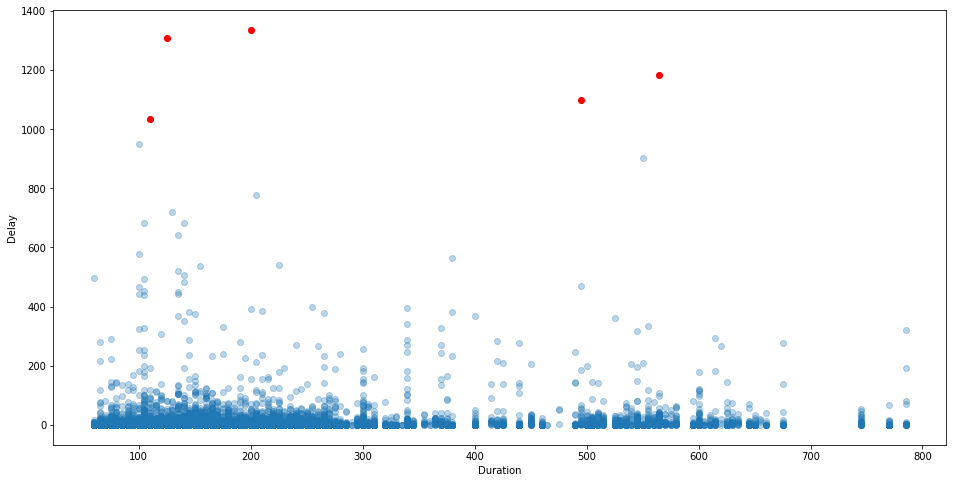

In [147]:
x_plot = df[["Duration" , "Delay"]].iloc[0:15000]
outliers = x_plot[(x_plot.Delay > 1000)]
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x_plot.iloc[:,0], x_plot.iloc[:,1], alpha=0.3)
ax.plot(outliers.iloc[:,0], outliers.iloc[:,1], "r." , marker = 'o')
#ax.plot()
ax.set_xlabel('Duration')
ax.set_ylabel('Delay')
plt.show()


Removing Outliers:

In [148]:
i = df[(df.Delay > 1000)].index
df = df.drop(i)
df

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration,Departure_Encoded,Destination_Encoded,departure_delay_mean,Arrival years,Arrival months,Arrival weekdays
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0,144,56,8.221783,2015,10,1
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0,144,68,8.221783,2015,10,1
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0,144,94,8.221783,2015,10,1
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0,144,82,8.221783,2015,10,2
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0,113,144,13.001770,2015,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0,144,145,8.221783,2018,9,5
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0,83,144,5.190694,2018,9,5
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0,144,37,8.221783,2018,9,5
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0,144,157,8.221783,2018,9,5


Spliting data into Train and Test regarding **Departure year**

In [149]:
#Departure = Data['Scheduled depature time']
x_train = []
x_test = []
for D in df.iloc:
  if "2015" in D[1] or "2016" in D[1] or "2017" in D[1]:
    x_train.append (D)
  else:
    x_test.append(D)

col_name = df.columns
x_train = pd.DataFrame(x_train, columns = col_name)
y_train = x_train["Delay"]
x_train

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration,Departure_Encoded,Destination_Encoded,departure_delay_mean,Arrival years,Arrival months,Arrival weekdays
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0,144,56,8.221783,2015,10,1
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0,144,68,8.221783,2015,10,1
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0,144,94,8.221783,2015,10,1
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0,144,82,8.221783,2015,10,2
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0,113,144,13.001770,2015,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
499055,SVO,2017-12-31 22:15:00,IKA,2018-01-01 02:05:00,0.0,230.0,144,65,8.221783,2018,1,0
499056,HAV,2017-12-31 22:40:00,SVO,2018-01-01 10:00:00,0.0,680.0,55,144,17.011259,2018,1,0
499057,SVO,2017-12-31 22:50:00,MLE,2018-01-01 07:35:00,0.0,525.0,144,95,8.221783,2018,1,0
499058,JFK,2017-12-31 22:20:00,SVO,2018-01-01 07:10:00,213.0,530.0,67,144,28.013074,2018,1,0


In [151]:
x_test = pd.DataFrame(x_test, columns = col_name)
y_test = x_test["Delay"]
x_test

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration,Departure_Encoded,Destination_Encoded,departure_delay_mean,Arrival years,Arrival months,Arrival weekdays
499059,ATH,2018-01-01 01:20:00,SVO,2018-01-01 05:30:00,0.0,250.0,11,144,4.428330,2018,1,0
499060,LHR,2018-01-01 01:30:00,SVO,2018-01-01 05:05:00,0.0,215.0,85,144,10.226194,2018,1,0
499061,DXB,2018-01-01 01:35:00,SVO,2018-01-01 07:15:00,0.0,340.0,35,144,12.648882,2018,1,0
499062,TLV,2018-01-01 02:00:00,SVO,2018-01-01 06:10:00,1.0,250.0,156,144,11.185018,2018,1,0
499063,BEY,2018-01-01 02:05:00,SVO,2018-01-01 06:00:00,0.0,235.0,16,144,11.456740,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0,144,145,8.221783,2018,9,5
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0,83,144,5.190694,2018,9,5
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0,144,37,8.221783,2018,9,5
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0,144,157,8.221783,2018,9,5


cleaning data and removing string features:


In [153]:
x_train = x_train.drop(['Scheduled depature time','Scheduled arrival time','Depature Airport',	'Destination Airport', 'Delay','Departure_Encoded', 'Destination_Encoded'], axis=1)
x_test = x_test.drop(['Scheduled depature time','Scheduled arrival time','Depature Airport',	'Destination Airport', 'Delay', 'Destination_Encoded', 'Destination Airport', 'Departure_Encoded'], axis=1)
x_test

,Duration,Departure_Encoded,departure_delay_mean,Arrival years,Arrival months,Arrival weekdays
499059,250.0,11,4.428330,2018,1,0
499060,215.0,85,10.226194,2018,1,0
499061,340.0,35,12.648882,2018,1,0
499062,250.0,156,11.185018,2018,1,0
499063,235.0,16,11.456740,2018,1,0
...,...,...,...,...,...,...
675508,140.0,144,8.221783,2018,9,5
675509,80.0,83,5.190694,2018,9,5
675510,85.0,144,8.221783,2018,9,5
675511,200.0,144,8.221783,2018,9,5


Applying Simple Linear Regression with *Duration* predictor:   
Since we want to apply simple regression, we need **single predictor** from our **X_train**

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [170]:

# Simple Linear Regression
X_tr = [[x] for x in x_train["Duration"]]
X_te = [[x] for x in x_test["Duration"]]
regressor = LinearRegression()
regressor.fit(X_tr,y_train)
print(f"Simple Linear Regression Model intercept : {regressor.intercept_}")
print(f"Simple Linear Regression Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_te)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Simple Linear Regression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Simple Linear Regression Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Simple Linear Regression Mean Squared Error (Train set error):', metrics.mean_squared_error(y_train, regressor.predict(X_tr)))
print('Simple Linear Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Simple Linear Regression R2 score:', metrics.r2_score(y_test, y_pred))


Simple Linear Regression Model intercept : 7.478756266153264
Simple Linear Regression Model coefficient : [0.01625121]
Simple Linear Regression Mean Absolute Error: 13.74758000020962
Simple Linear Regression Mean Squared Error: 1250.3941214286233
Simple Linear Regression Mean Squared Error (Train set error): 1619.2968278176918
Simple Linear Regression Root Mean Squared Error: 35.36091233874804
Simple Linear Regression R2 score: -0.012469820062563253


Applying Simple Linear Regression with *departure_delay_mean* predictor

In [156]:

# Simple Linear Regression
X_tr = [[x] for x in x_train["departure_delay_mean"]]
X_te = [[x] for x in x_test["departure_delay_mean"]]
regressor = LinearRegression()
regressor.fit(X_tr,y_train)
# print(f"Simple Linear Regression Model intercept : {regressor.intercept_}")
# print(f"Simple Linear Regression Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_te)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Simple Linear Regression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Simple Linear Regression Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Simple Linear Regression Mean Squared Error (Train set error):', metrics.mean_squared_error(y_train, regressor.predict(X_tr)))
print('Simple Linear Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Simple Linear Regression R2 score:', metrics.r2_score(y_test, y_pred))


Simple Linear Regression Mean Absolute Error: 13.720527250479693
Simple Linear Regression Mean Squared Error: 1245.0834000295708
Simple Linear Regression Mean Squared Error (Train set error): 1608.7843412268394
Simple Linear Regression Root Mean Squared Error: 35.28573932950209
Simple Linear Regression R2 score: -0.00816961979198183


Applying Multiple Regression bot *departure_delay_mean and Duration*:

In [166]:
regressor = LinearRegression()
regressor.fit(x_train[["departure_delay_mean", 'Duration']],y_train)


y_pred = regressor.predict(x_test[["departure_delay_mean", 'Duration']])
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Multiple Linear Regression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Multiple Linear Regression Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Multiple Linear Regression Mean Squared Error (Train set error):', metrics.mean_squared_error(y_train, regressor.predict(x_train[["departure_delay_mean", 'Duration']])))
print('Multiple Linear Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Multiple Linear Regression R2 score:', metrics.r2_score(y_test, y_pred))

Multiple Linear Regression Mean Absolute Error: 13.687713072250274
Multiple Linear Regression Mean Squared Error: 1244.0558181990943
Multiple Linear Regression Mean Squared Error (Train set error): 1608.4159183188744
Multiple Linear Regression Root Mean Squared Error: 35.27117545814279
Multiple Linear Regression R2 score: -0.007337565663469547


Applying Polynomial Regression:

In [169]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_features = PolynomialFeatures(degree= 4)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(x_train[["departure_delay_mean", 'Duration']], y_train)
y_pred = pipeline.predict(x_test[["departure_delay_mean", 'Duration']])
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Polynomial Regression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Polynomial Regression Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Polynomial Regression Mean Squared Error (Train set error):', metrics.mean_squared_error(y_train, pipeline.predict(x_train[["departure_delay_mean", 'Duration']])))
print('Polynomial Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Polynomial Regression R2 score:', metrics.r2_score(y_test, y_pred))

Polynomial Regression Mean Absolute Error: 13.673098736590036
Polynomial Regression Mean Squared Error: 1243.7484438369834
Polynomial Regression Mean Squared Error (Train set error): 1606.6358999921256
Polynomial Regression Root Mean Squared Error: 35.26681788646352
Polynomial Regression R2 score: -0.0070886783248576


Applying Lasso Regularization:

In [164]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

# print(f"Lasso Regularization Model intercept : {lasso.intercept_}")
# print(f"Lasso Regularization Model coefficient : {lasso.coef_}")

y_pred = lasso.predict(x_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Lasso Regularization Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Lasso Regularization Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Lasso Regularization Mean Squared Error (Train set error):', metrics.mean_squared_error(y_train, lasso.predict(x_train)))
print('Lasso Regularization Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Lasso Regularization R2 score:', metrics.r2_score(y_test, y_pred))


Lasso Regularization Mean Absolute Error: 13.68735831050148
Lasso Regularization Mean Squared Error: 1243.7572962974557
Lasso Regularization Mean Squared Error (Train set error): 1608.482284013481
Lasso Regularization Root Mean Squared Error: 35.26694339317565
Lasso Regularization R2 score: -0.007095846344050916


In [ ]:
eval_df

,Actual,Predicted
499059,0.0,13.581714
499060,0.0,12.510263
499061,0.0,14.947708
499062,1.0,12.641712
499063,0.0,13.295703
...,...,...
675508,0.0,10.942902
675509,0.0,10.291932
675510,0.0,6.553651
675511,0.0,12.341666
